#  Introdução

Esse projeto tem como intuito mostrar o atual cenário econômico e educacional no Brasil em ótica de comparação entre a população branca e a popoulação negra,é necessário destacar que a população negra é uma junção entre pessoas pardas e pretas.

Neste projeto iremos abordar o cenário demográfico de raças no Brasil, o cénario econômico e o educacional, buscando responder perguntas que coloquem em pauta alguma disigualdade entre esses dois grupos, tendo como pergunta principal "Mesmo depois do fim da escravidão ainda existe diferenças entre brancos e negros?".

# 1. Carregando Bibliotecas

In [1]:
import numpy as np
import folium 
import pandas as pd
import matplotlib.pyplot as plt
import json
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import os
import warnings
import geopandas as gpd
from IPython.display import Image
import kaleido
warnings.filterwarnings('ignore')

# 2. Importando os Dados

Todos os dados utilizados são dados do governo brasileiro, no caso foram usados dados do censo de 2022, 1872 e o censo escolar de 2020

In [4]:
principal = pd.read_csv("principal.csv")
escravos = pd.read_csv("escravos_censo_1872.csv", encoding = "latin1", delimiter = ';')
educacao = pd.read_csv("matriculas.csv", delimiter = ',')

# 3. Limpeza de Dados e formatação do dataframe

In [5]:
principal.head()

,estados,% População Branca no Estado,% População Negra no Estado,Média Salarial Total,Média Salarial Branca,Média Salarial Negra,Diferença de Salário,% de Pessoas com ensino superior,% da população que possui ensino superior que são brancos,% da população com ensino superior que são negros,"% Razão Negros x Brancos, População","Razão Negros X Brancos, Ensino Superior"
0,Brasil ...,43.46,55.51,2979,3847,2264.59,0.70,12.73,62.34,36.27,1.28,0.58
1,Rondônia ...,30.74,67.89,2695,3343,2459.21,0.36,10.41,41.08,58.06,2.21,1.41
2,Acre ...,21.44,74.81,2358,3215,2148.26,0.50,10.16,29.55,69.50,3.49,2.35
3,Amazonas ...,18.39,73.71,2367,3576,2126.73,0.68,8.69,29.64,67.59,4.01,2.28
4,Roraima ...,20.62,64.97,2791,3745,2527.32,0.48,10.53,31.45,64.24,3.15,2.04


In [6]:
principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   estados                                                    28 non-null     object 
 1   % População Branca no Estado                               28 non-null     float64
 2   % População Negra no Estado                                28 non-null     float64
 3   Média Salarial Total                                       28 non-null     int64  
 4   Média Salarial Branca                                      28 non-null     int64  
 5   Média Salarial Negra                                       28 non-null     float64
 6   Diferença de Salário                                       28 non-null     float64
 7   % de Pessoas com ensino superior                           28 non-null     float64
 8   % da populaç

Nenhuma coluna possui valores faltantes.

In [7]:
principal.shape

(28, 12)

In [8]:
principal["Siglas"] = siglas_estados = ["BR", "RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL", "SE", 
                                 "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF"]

In [9]:
escravos.head()

,Estados,Homens Escravos,Mulheres Escravas,Total Escravos,População Livre,População Total,Unnamed: 6
0,Amazonas,487,492,979,56631,57610,NaN
1,Pará,13908,13550,27458,247779,275237,NaN
2,Maranhão,36889,38050,74939,284101,359040,NaN
3,Piaui,11945,11850,23795,178429,202224,NaN
4,Ceará,14941,16972,31913,689773,721686,NaN


In [10]:
escravos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Estados            20 non-null     object 
 1   Homens Escravos    20 non-null     int64  
 2   Mulheres Escravas  20 non-null     int64  
 3   Total Escravos     20 non-null     int64  
 4   População Livre    20 non-null     int64  
 5   População Total    20 non-null     int64  
 6   Unnamed: 6         0 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.2+ KB


Nenhuma coluna possui dados faltantes.

In [11]:
escravos["Siglas"]= [
    'AM', 'PA', 'MA',"PI", 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'ES', 'RJ', 'SP',
    'PR', 'SC', 'RS', 'MG', 'GO', 'MT'
]

In [12]:
educacao.head()

,Localidade da Escola,Total Geral,Total de Público,Branca (Publico),Preta (Publico),Parda (Publico),Amarela (Publico),Indígena (Publico),Não declarada (Publico),Total de Privada,Branca (Privada),Preta (Privada),Parda (Privada),Amarela (Privada),Indígena (Privada),Não declarada (Privada)
0,DF,629593.0,426335.0,89534.0,15157.0,175899.0,1606.0,540.0,143599.0,203258.0,73951.0,4546.0,53713.0,1035.0,156.0,69857.0
1,GO,1550149.0,1257221.0,281849.0,57584.0,743563.0,7476.0,1815.0,164934.0,292928.0,113029.0,5659.0,102628.0,2475.0,181.0,68956.0
2,MS,679596.0,574104.0,224087.0,12000.0,272809.0,1094.0,28276.0,35838.0,105492.0,65706.0,1596.0,23813.0,700.0,620.0,13057.0
3,MT,898482.0,778943.0,124326.0,22109.0,491100.0,1859.0,20756.0,118793.0,119539.0,41380.0,1968.0,30520.0,448.0,145.0,45078.0
4,AL,863732.0,729640.0,95385.0,24597.0,504846.0,2125.0,5458.0,97229.0,134092.0,29007.0,2022.0,55508.0,413.0,217.0,46925.0


In [13]:
educacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Localidade da Escola     27 non-null     object 
 1   Total Geral              27 non-null     float64
 2   Total de Público         27 non-null     float64
 3   Branca (Publico)         27 non-null     float64
 4   Preta (Publico)          27 non-null     float64
 5   Parda (Publico)          27 non-null     float64
 6   Amarela (Publico)        27 non-null     float64
 7   Indígena (Publico)       27 non-null     float64
 8   Não declarada (Publico)  27 non-null     float64
 9   Total de Privada         27 non-null     float64
 10  Branca (Privada)         27 non-null     float64
 11  Preta (Privada)          27 non-null     float64
 12  Parda (Privada)          27 non-null     float64
 13  Amarela (Privada)        27 non-null     float64
 14  Indígena (Privada)       27 

Nenhuma coluna com dados faltantes.

### 4. Analíse gráfica dos dados

### 4.1 Parametro Geral

Primeiramente vamos analisar de uma forma geral a distrubuição racial do Brasil:

In [14]:
pop_negra = principal.drop(0, axis = 0)

In [15]:
pop_negra.head()

,estados,% População Branca no Estado,% População Negra no Estado,Média Salarial Total,Média Salarial Branca,Média Salarial Negra,Diferença de Salário,% de Pessoas com ensino superior,% da população que possui ensino superior que são brancos,% da população com ensino superior que são negros,"% Razão Negros x Brancos, População","Razão Negros X Brancos, Ensino Superior",Siglas
1,Rondônia ...,30.74,67.89,2695,3343,2459.21,0.36,10.41,41.08,58.06,2.21,1.41,RO
2,Acre ...,21.44,74.81,2358,3215,2148.26,0.50,10.16,29.55,69.50,3.49,2.35,AC
3,Amazonas ...,18.39,73.71,2367,3576,2126.73,0.68,8.69,29.64,67.59,4.01,2.28,AM
4,Roraima ...,20.62,64.97,2791,3745,2527.32,0.48,10.53,31.45,64.24,3.15,2.04,RR
5,Pará ...,19.34,79.64,2265,3245,2014.39,0.61,7.40,30.26,68.92,4.12,2.28,PA


In [16]:
coluna_mapa = "% População Negra no Estado"
pop_negra[coluna_mapa] = pd.to_numeric(pop_negra[coluna_mapa], errors='coerce')
pop_negra[coluna_mapa] = pop_negra[coluna_mapa].fillna(0.0)

In [17]:
pop_negra.head()

,estados,% População Branca no Estado,% População Negra no Estado,Média Salarial Total,Média Salarial Branca,Média Salarial Negra,Diferença de Salário,% de Pessoas com ensino superior,% da população que possui ensino superior que são brancos,% da população com ensino superior que são negros,"% Razão Negros x Brancos, População","Razão Negros X Brancos, Ensino Superior",Siglas
1,Rondônia ...,30.74,67.89,2695,3343,2459.21,0.36,10.41,41.08,58.06,2.21,1.41,RO
2,Acre ...,21.44,74.81,2358,3215,2148.26,0.50,10.16,29.55,69.50,3.49,2.35,AC
3,Amazonas ...,18.39,73.71,2367,3576,2126.73,0.68,8.69,29.64,67.59,4.01,2.28,AM
4,Roraima ...,20.62,64.97,2791,3745,2527.32,0.48,10.53,31.45,64.24,3.15,2.04,RR
5,Pará ...,19.34,79.64,2265,3245,2014.39,0.61,7.40,30.26,68.92,4.12,2.28,PA


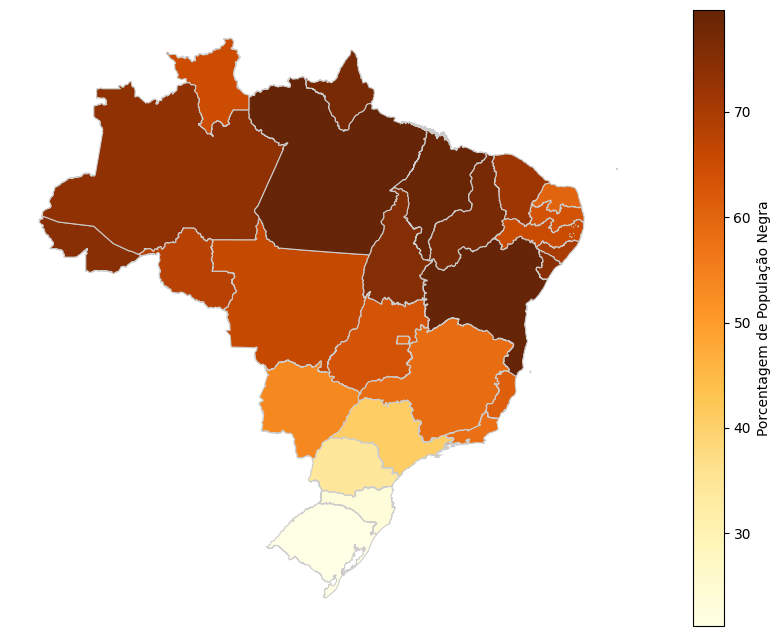

In [18]:
geojson_path = 'br_states.json'
gdf = gpd.read_file(geojson_path)

gdf_merged = gdf.set_index('id').join(pop_negra.set_index("Siglas"))
fig, ax = plt.subplots(figsize = (12,8))
gdf_merged.plot(column = "% População Negra no Estado", cmap = "YlOrBr",
                ax = ax, edgecolor = '0.8', linewidth = 0.8,
                legend = True, legend_kwds = {"label": "Porcentagem de População Negra"})

ax.axis("off")
plt.show()


Com esse mapa podemos observar uma grande diferença na distribuição racial. Temos apenas os estados da região Sul e o estado de São Paulo com valores totais da população negra inferior a 50% do total populacional. Podemos destacar valores maiores para os estados do Norte e Nordeste principalmente, mas quais são os Estados com os maiores e menores índices de população negra?

In [19]:
pop_negra_ordenado = pop_negra.sort_values(by = "% População Negra no Estado", ascending = False)

In [20]:
porcentagem_negra = pop_negra_ordenado["% População Negra no Estado"].tolist()

In [21]:
estados = pop_negra_ordenado["Siglas"]
primeiro_negra = porcentagem_negra[:5]
primeiro_branca = []
primeiro_estados = estados[:5]

for i in primeiro_negra:
    primeiro_branca.append(round(100 - i,2))

    
    
segundo_branca = []
segundo_negro = porcentagem_negra[-5:]
segundo_estados = estados[-5:]

for x in segundo_negro:
    segundo_branca.append(round(100 - x,2))

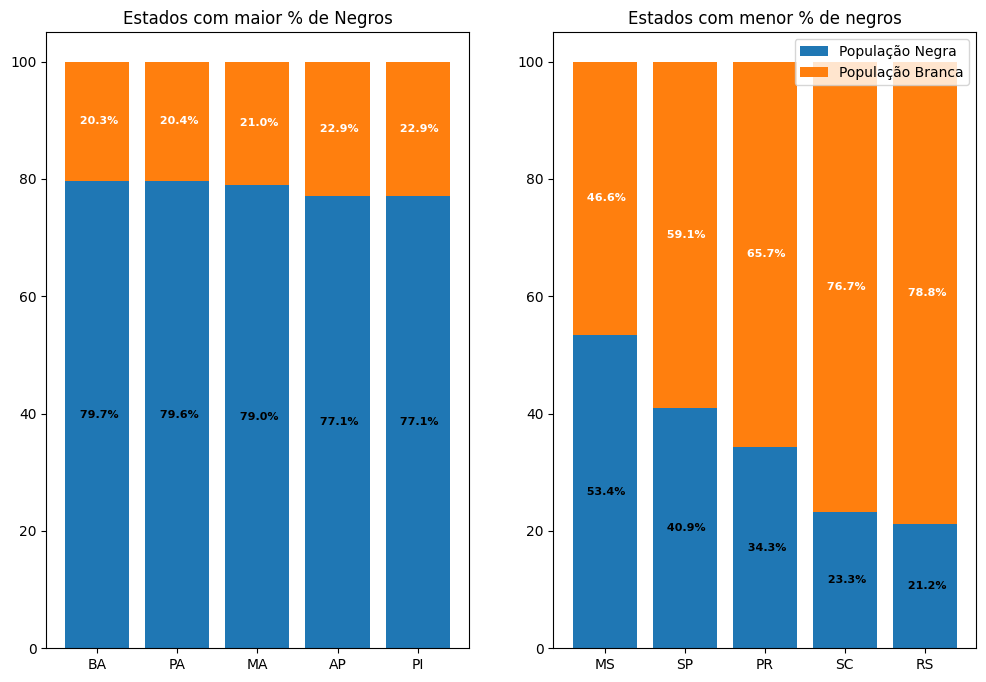

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2 ,figsize = (12,8))
primeiro_negros = axes[0].bar(primeiro_estados,primeiro_negra, label = "População Negra")
primeiro_brancos = axes[0].bar(primeiro_estados, primeiro_branca,bottom = primeiro_negra, label = "População Branca")

for i, barra in enumerate(primeiro_negros):
    altura = barra.get_height()
    axes[0].text(
        barra.get_x() + barra.get_width() / 2,
        altura / 2,
        f'{primeiro_negra[i]: .1f}%',
        ha = 'center', va = 'center',
        fontsize = 8, color = "black", weight = 'bold'
    )
    
for i, barra in enumerate(primeiro_brancos):
    altura = barra.get_height()
    sobreposicao = primeiro_negros[i].get_height()
    axes[0].text(
        barra.get_x() + barra.get_width() / 2,
        altura / 2 + sobreposicao,
        f'{primeiro_branca[i]: .1f}%',
        ha = 'center', va = 'center',
        fontsize = 8, color = 'white', weight = 'bold'
    )
segundo_negros = axes[1].bar(segundo_estados, segundo_negro, label = "População Negra")
segundo_brancos = axes[1].bar(segundo_estados, segundo_branca, bottom = segundo_negro, label = "População Branca")

for i,barra in enumerate(segundo_negros):
    altura = barra.get_height()
    axes[1].text(
        barra.get_x() + barra.get_width() / 2,
        altura / 2,
        f'{segundo_negro[i]: .1f}%',
        ha = "center", va = 'center',
        fontsize = 8, color = 'black', weight = 'bold'
    )
    
for i,barra in enumerate(segundo_brancos):
    altura = barra.get_height()
    sobreposicao = segundo_negros[i].get_height()
    axes[1].text(
        barra.get_x() + barra.get_width() / 2,
        altura / 2 + sobreposicao,
        f'{segundo_branca[i]: .1f}%',
        ha = 'center', va = 'center',
        fontsize = 8, color = 'white', weight = 'bold'
    )

axes[0].set_title("Estados com maior % de Negros")
axes[1].set_title("Estados com menor % de negros")

plt.legend()

O Gráfico acima reforça a diferença na composição étnico-racial do país, é possivel concluir que nos estados do Norte e Nordeste há uma predominância da população negra, enquanto principalmente no Sul há uma predominância de população branca, tal cenário reflete a historia de colonização e imigração do país, bem como o processo de escravidão.
Logo a termo de comparação utilizaremos principalmente esses estados para reforçar dados e analises, pois eles entre si tem a maior diferença racial

### 4.2 Escravidão

Antes de qualquer comparação em aspectos econômicos e educacionais, é necessário olharmos para passado antes de olharmos para o presente. É indiscutível que a escravidão deixou cicatrizes que ainda não foram curadas, mas como estava a situação do Brasil no final da escravidão?

Os dados analisados a seguir vieram do Censo de 1872, o primeiro levantamento, e mais próximo do ano de 1888, quando foi declarada a lei Áurea que libertou os negros da escravidão.

In [23]:
escravos_salario_atual = pd.merge(escravos,principal, on = "Siglas", how ="inner")

In [24]:
escravos_salario_atual.head()

,Estados,Homens Escravos,Mulheres Escravas,Total Escravos,População Livre,População Total,Unnamed: 6,Siglas,estados,% População Branca no Estado,% População Negra no Estado,Média Salarial Total,Média Salarial Branca,Média Salarial Negra,Diferença de Salário,% de Pessoas com ensino superior,% da população que possui ensino superior que são brancos,% da população com ensino superior que são negros,"% Razão Negros x Brancos, População","Razão Negros X Brancos, Ensino Superior"
0,Amazonas,487,492,979,56631,57610,NaN,AM,Amazonas ...,18.39,73.71,2367,3576,2126.73,0.68,8.69,29.64,67.59,4.01,2.28
1,Pará,13908,13550,27458,247779,275237,NaN,PA,Pará ...,19.34,79.64,2265,3245,2014.39,0.61,7.40,30.26,68.92,4.12,2.28
2,Maranhão,36889,38050,74939,284101,359040,NaN,MA,Maranhão ...,20.10,79.00,1877,2549,1718.18,0.48,6.92,31.46,68.18,3.93,2.17
3,Piaui,11945,11850,23795,178429,202224,NaN,PI,Piauí ...,22.63,77.08,2304,3536,1987.26,0.78,9.32,32.65,67.10,3.41,2.06
4,Ceará,14941,16972,31913,689773,721686,NaN,CE,Ceará ...,27.93,71.48,1926,2725,1642.45,0.66,8.63,42.50,56.93,2.56,1.34


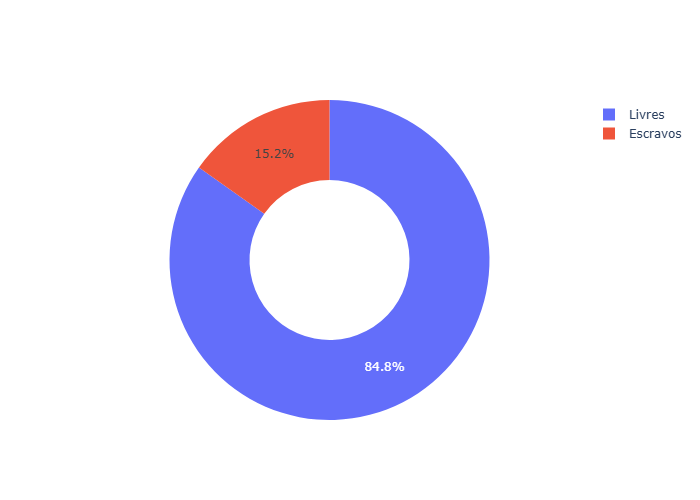

In [26]:
populacao_total = escravos_salario_atual["População Livre"].sum()
populacao_escrava = escravos_salario_atual["Total Escravos"].sum()
legenda = ["Escravos","Livres"]
dados = [populacao_escrava, populacao_total]
fig = go.Figure()
fig.add_trace(go.Pie(labels = legenda, 
                              values = dados,
                             hole = 0.5))
fig.write_image("divisao_escravos.png")
Image(filename = "divisao_escravos.png")

O gráfico nos mostra como era o cenário do Brasil em meados de 1872, cerca de pouco mais de 15% da população era escrava.

In [27]:
escravos["% de Populacao Negra"] = (escravos["Total Escravos"] / escravos["População Livre"]) * 100 

Text(0, 0.5, '% de Escravos')

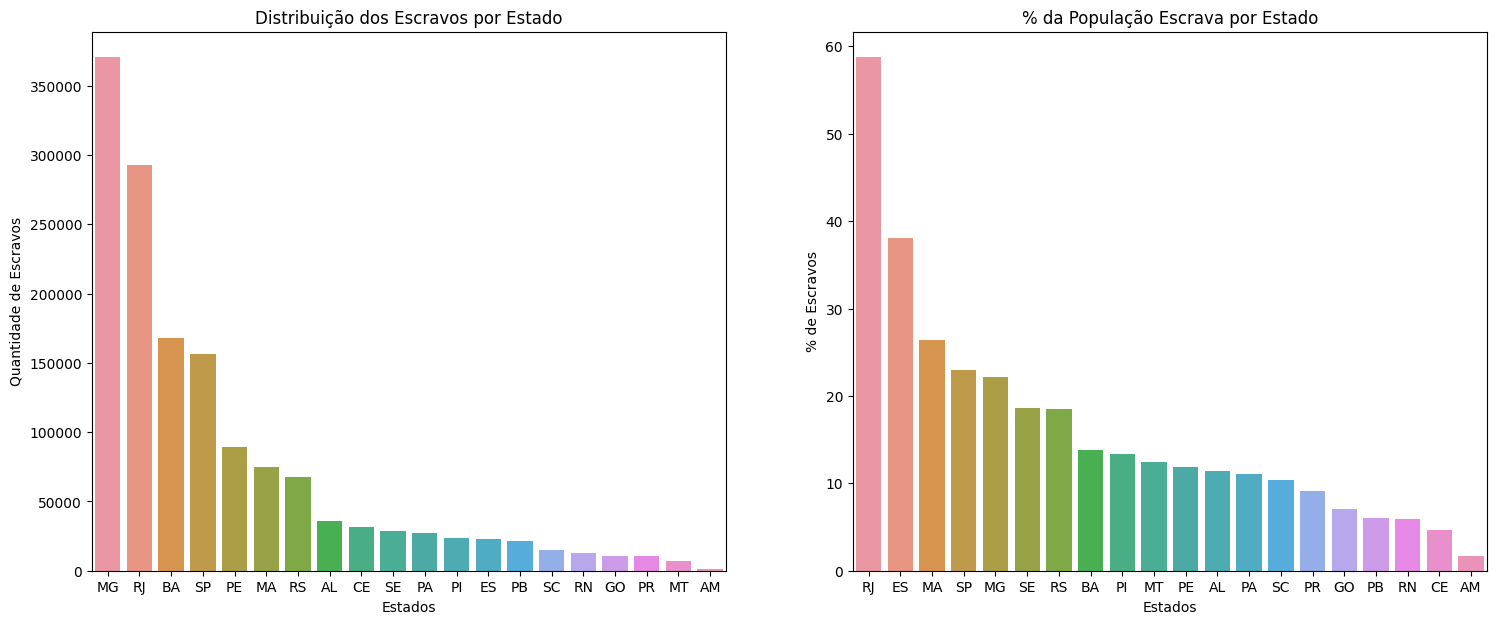

In [28]:
siglas = escravos["Siglas"].tolist()
total_escravos = escravos["Total Escravos"].tolist()
populacao_total = escravos["População Total"].tolist()
porcentagem = []
for i in range(len(total_escravos)):
    porcentagem.append(round((total_escravos[i] / populacao_total[i]) * 100,2))
ordenado_total = escravos.sort_values(by = "Total Escravos" , ascending  = False)["Siglas"]
ordenado_porcentagem = escravos.sort_values(by = "% de Populacao Negra", ascending = False)["Siglas"]

fig, axes = plt.subplots(1,2,figsize = (18,7))


sns.barplot(data = escravos,
           x = "Siglas",
           y = "Total Escravos",
           order = ordenado_total,
           ax = axes[0])
axes[0].set_title("Distribuição dos Escravos por Estado")
axes[0].set_xlabel("Estados")
axes[0].set_ylabel("Quantidade de Escravos")


sns.barplot(data = escravos,
           x = "Siglas",
           y = "% de Populacao Negra",
           order = ordenado_porcentagem,
           ax = axes[1])
axes[1].set_title("% da População Escrava por Estado")
axes[1].set_xlabel("Estados")
axes[1].set_ylabel("% de Escravos")




### Analisando esses dois gráficos com a estrutura etnica-racial do Brasil atual, podemos concluir que houveram mudanças, porem ainda existem continuidades na demografia racial brasileira.
Em 1872, a distribuição de pessoas escravizadas apresentava cenários distintos:

Em números absolutos temos Minas Gerais, Rio de Janeiro, Bahia, São Paulo e Pernambuco, nessa ordem, ocupando o posto de estados com maior números de escravos, com Minas Gerais liderando por grande margem.

Em proporção de população total, a ordem acaba se alterando um pouco, com Rio de Janeiro, Espírito Santo, Maranhão, São Paulo e Minas Gerais, nessa ordem, destacando-se a entrada do Espírito Santo e do Maranhão que não participavam dos líderes em números absolutos


### Comparando esses dados hístoricos com a distribuição racial atual da população negra temos os seguintes pontos:

Houve persistência em alguns padrões: Os estados do Maranhão e da Bahia são exemplos claros, mantendo uma alta porcentagem de população negra desde 1872 até os dias atuais. Rio de Janeiro e Espírito Santo também demonstram essa continuidade

Grandes transformações ocorreram:

A Região Norte que ainda não estava da forma que conhecemos atualmente, hoje exibe as maiores concentrações de população
negra.
São Paulo, apesar de ter sido um grande polo escravista, atualmente possui uma porcentagem bem inferior das regiões do
Norte e Nordeste.
Estados do Nordeste como Piauí, Ceará, Paraíba, Rio Grande do Norte, Alagoas e Sergipe, embora talvez não no "top 5" de 1872, hoje apresentam altas concentrações, consolidando a região.

### Conclusão:

Respondendo a pergunta "A estrutura racial no Brasil de 1872 tem algo haver com a estrutura atual?", podemos afirmar que existe uma conexão inegável, mas com profundas alterações. Não se trata de uma diferença total, visto que, as raízes e heranças ainda se manifestam em estados como Bahia e Maranhão. No entato, muitos pontos se alteraram devido a fatores históricos com as políticas de incentivo à imigração europeia pós-abolição, que transformaram o perfil demográfico de regiões como Sul e Sudeste, e os próprios processos migrátorios da população branca para os grandes centros econômicos.

### 4.3 Questão Econômica

Agora que já temos uma noção da distribuição racial do Brasil poderemos começar a abordar se existe diferença econômica e educacional.
Primeiramente iremos abordar a parte econômica, todos os dados utilizados vieram do último Censo(2022)

Perguntas:

- Existe alguma diferença econômica entre Brancos e Negros? Se sim quais são os Estados/Regiões onde essa diferença é maior e menor?

- Olhando para o Censo de 1872, existe alguma convergência entre a relação econômica atual com a escravidão?

<BarContainer object of 28 artists>

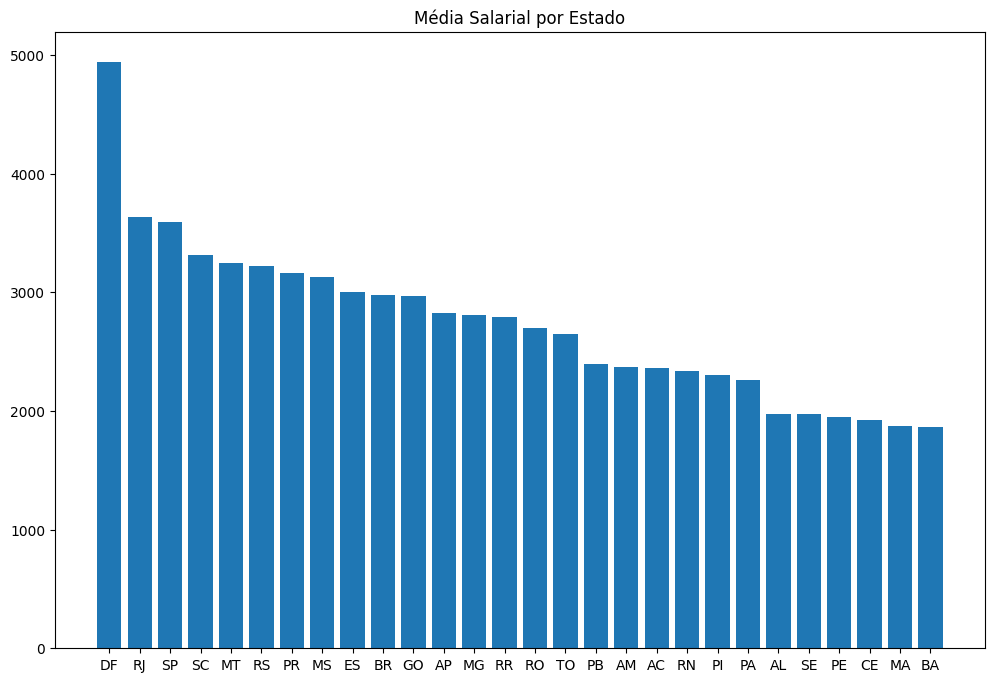

In [29]:
media_geral = principal.sort_values(by = "Média Salarial Total", ascending = False)
estados = media_geral["Siglas"].tolist()
salario_medio = media_geral["Média Salarial Total"].tolist()

fig = plt.figure(figsize = (12,8))
plt.title("Média Salarial por Estado")
plt.bar(estados,salario_medio)

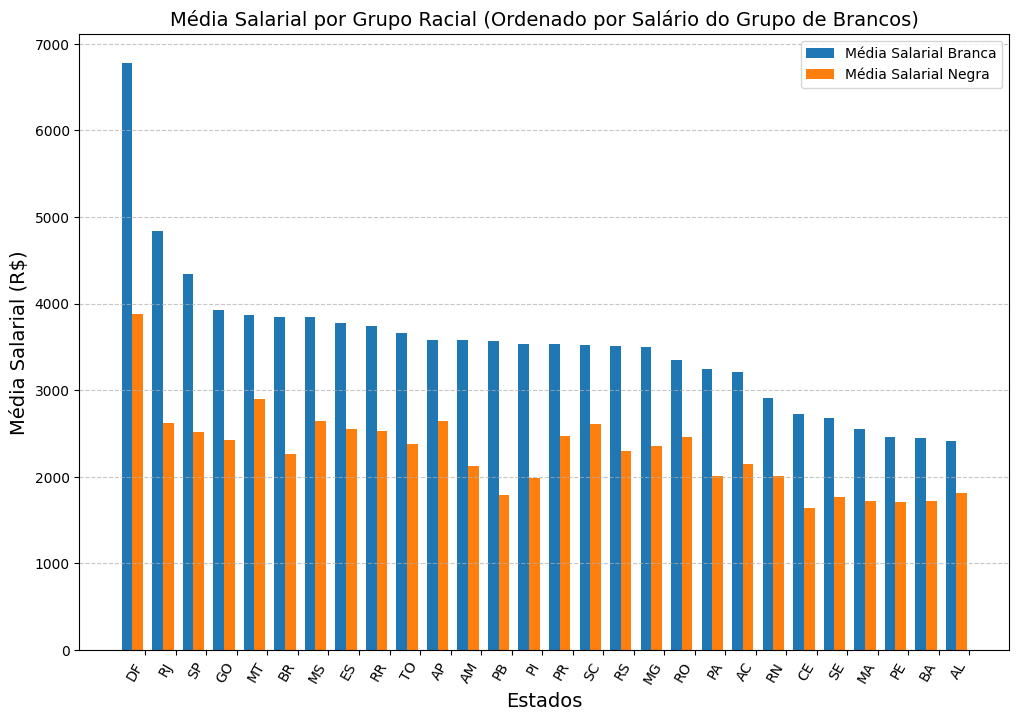

In [30]:
df2 = principal.sort_values(by = "Média Salarial Branca", ascending = False)
estados = df2["Siglas"].tolist()
media_salarial_branca = df2["Média Salarial Branca"].tolist()
media_salarial_negra = df2["Média Salarial Negra"].tolist()

bar_width = 0.35
index = np.arange(len(estados))

fig, ax = plt.subplots(figsize = (12,8))

barras_brancas = ax.bar(index, media_salarial_branca, bar_width, label = "Média Salarial Branca")
barras_negras = ax.bar(index + bar_width, media_salarial_negra, bar_width, label = "Média Salarial Negra")

ax.set_xlabel("Estados", fontsize = 14)
ax.set_ylabel("Média Salarial (R$)", fontsize = 14)
ax.set_title("Média Salarial por Grupo Racial (Ordenado por Salário do Grupo de Brancos)", fontsize = 14)
ax.set_xticklabels(estados, rotation=60, ha='right', fontsize=10)
ax.set_xticks(index + bar_width + 0.5 / 2)
ax.set_xticklabels(estados, rotation=60, ha='right', fontsize=10) 

ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

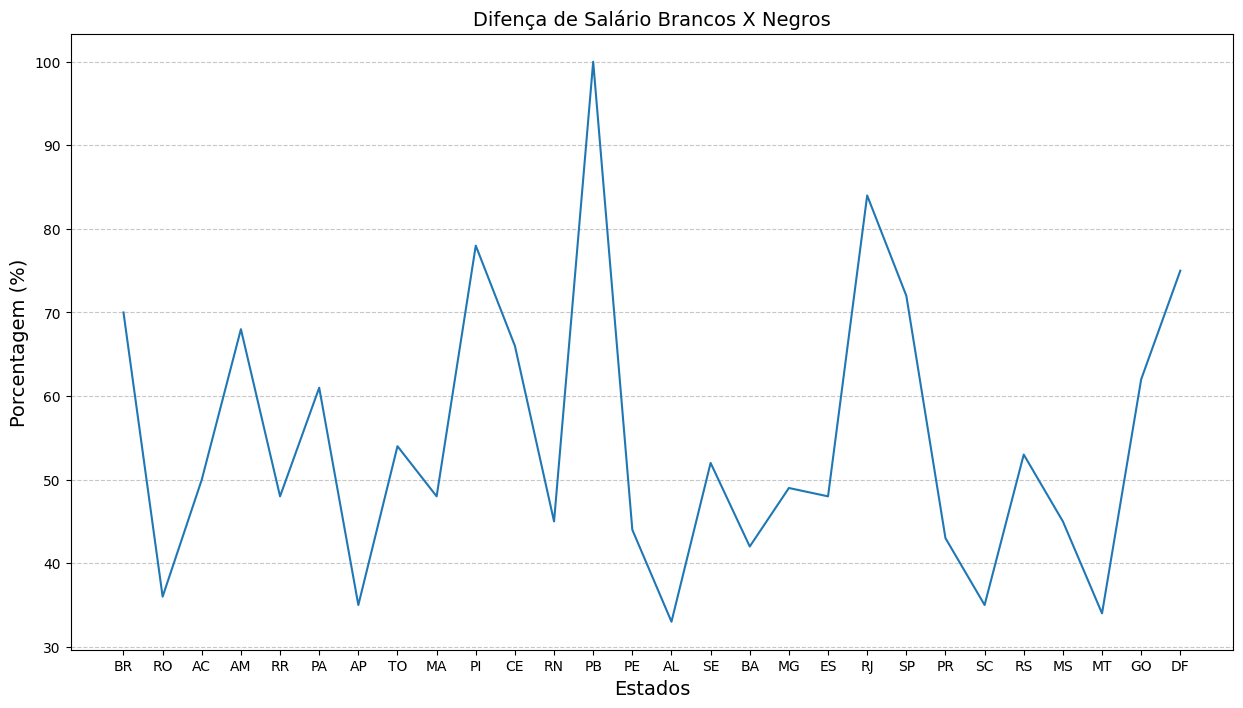

In [31]:
estados = principal["Siglas"].tolist()
diferenca_salarial = principal["Diferença de Salário"].to_numpy()

fig, ax = plt.subplots(figsize = (15,8))
plt.plot(estados,diferenca_salarial*100)
plt.xlabel("Estados", fontsize = 14)
plt.ylabel("Porcentagem (%)", fontsize = 14)
plt.title("Difença de Salário Brancos X Negros", fontsize = 14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

### Tendo em vista esse parâmetro geral da situação econômica do Brasil, temos no primeiro gráfico a média salarial por estado, com o destaque positivo para:

- Distrito Federal: Média de 4.944 reais
- Rio de Janeiro: Média de 3.632 reais
- São Paulo Média de 3.592 reais

### E destaque negativo para:

- Ceará: Média de 1.926 reais
- Maranhão: Média de 1.877 reais
- Bahia: Média de 1.865 reais

Ou seja temos como destaques positivos a capital do país, além de dois estados da região Sudeste, sendo o maior polo econômico do Brasil e para os destaques negativos temos três estados da região Nordeste, região com maior índice de pessoas negras.

Agora partindo para o segundo gráfico que aborda justamente a difereça entre a média salarial branca e negra por estado, observamos ainda mais uma diferença entre os grupos raciais, **onde literalmente nenhum estado possui pessoas negras com uma média salarial maior que pessoas brancas**. Vale destacar positivamente o Destrito Federal que tem a maior média salarial negra, cerca de 4.000 reais, porém com uma diferença enorme se comparado com a média salarial branca que chega a cerca de quase 7.000 reais.

Analisando o ultimo dos três gráficos temos valores exatos entre a diferença salarial entre negros e brancos. Temos como menor diferença percentual o estado de Alagoas com cerca de 30%, enquanto de acordo com dados do IBGE, a diferença salarial no Brasil é de cerca de 70%

Após uma analíse inicial do gráficos, já é possivel responder a primeira pergunta, começando com:
"Existe alguma diferença econômica entre Brancos e Negros? Se sim quais são os Estados/Regiões onde essa diferença é maior e menor?"

É possível se concluir que existe uma grande diferença econômica entre brancos e negros, o dado de uma diferença salarial de 70% referente ao Brasil de uma forma geral, já nos mostra o tamanho dessa diferença, pessoas brancas ganham cerca de 70% a mais que pessoas negras no nosso país. Agora referente a quais estados/regiões tem a maior e menor diferença não é possível estabalecer uma conexão de forma simples, enquanto alguns estados do nordeste tem indices de diferenças altas, outros também possuem índices baixos, e esse cenário acontece também com as outras regiões. Mas os estados com as maiores diferenças são:

- Paraíba: Cerca de 100%
- Rio de Janeiro: Cerca de 87%
- Piauí : Cerca de 75%
- Amazonas: Cerca de 68%
- Distrito Federal: Cerca de 80%


Agora referente a pergunta:
- Olhando para o Censo de 1872, existe alguma relação entre a relação econômica atual com a escravidão?

Partiremos dos Dados de escravos em cada estado que existiam em 1872 e a média salarial da população negra atualmente


In [30]:
escravos_salario_atual = pd.merge(escravos,principal, on = "Siglas", how ="inner")

In [31]:
escravos_salario_atual.head()

,Estados,Homens Escravos,Mulheres Escravas,Total Escravos,População Livre,População Total,Unnamed: 6,Siglas,% de Populacao Negra,estados,...,% População Negra no Estado,Média Salarial Total,Média Salarial Branca,Média Salarial Negra,Diferença de Salário,% de Pessoas com ensino superior,% da população que possui ensino superior que são brancos,% da população com ensino superior que são negros,"% Razão Negros x Brancos, População","Razão Negros X Brancos, Ensino Superior"
0,Amazonas,487,492,979,56631,57610,NaN,AM,1.728735,Amazonas ...,...,73.71,2367,3576,2126.73,0.68,8.69,29.64,67.59,4.01,2.28
1,Pará,13908,13550,27458,247779,275237,NaN,PA,11.081649,Pará ...,...,79.64,2265,3245,2014.39,0.61,7.40,30.26,68.92,4.12,2.28
2,Maranhão,36889,38050,74939,284101,359040,NaN,MA,26.377591,Maranhão ...,...,79.00,1877,2549,1718.18,0.48,6.92,31.46,68.18,3.93,2.17
3,Piaui,11945,11850,23795,178429,202224,NaN,PI,13.335837,Piauí ...,...,77.08,2304,3536,1987.26,0.78,9.32,32.65,67.10,3.41,2.06
4,Ceará,14941,16972,31913,689773,721686,NaN,CE,4.626595,Ceará ...,...,71.48,1926,2725,1642.45,0.66,8.63,42.50,56.93,2.56,1.34


Text(0, 0.5, 'Média Salarial Negra')

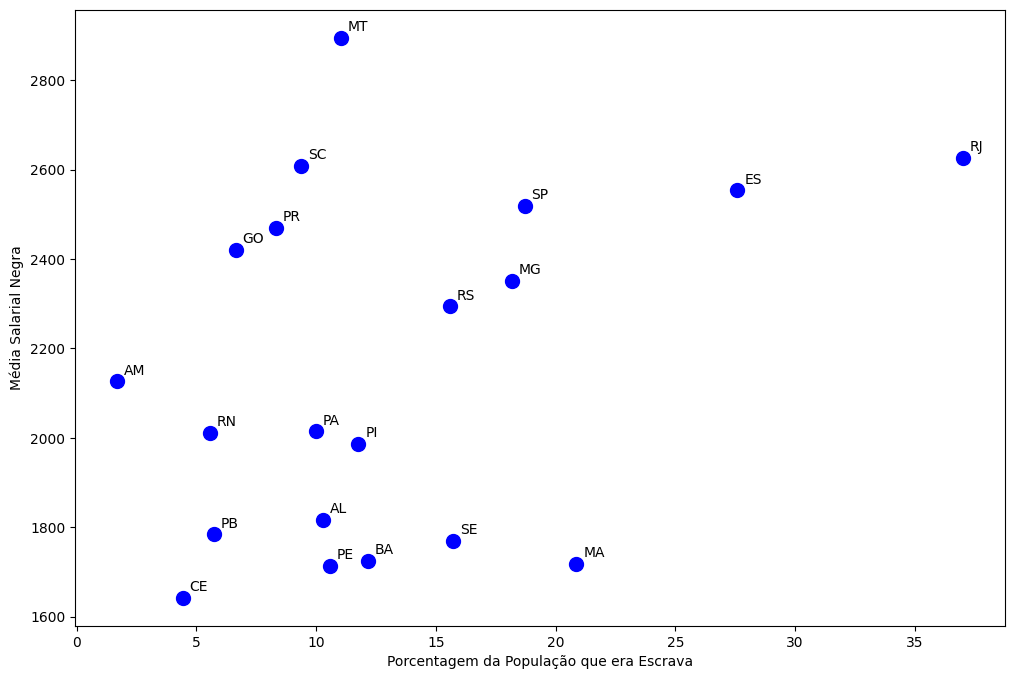

In [32]:
estados = escravos_salario_atual["Siglas"].tolist()
escravos_totais = escravos_salario_atual["Total Escravos"]
populacao_total = escravos_salario_atual["População Total"].tolist()
media_salarial_negra = escravos_salario_atual["Média Salarial Negra"].tolist() 
porcentagem_estado = []

for i in range(len(escravos_totais)):
    porcentagem = (escravos_totais[i] / populacao_total[i]) * 100
    porcentagem_estado.append(porcentagem)
        
plt.figure(figsize = (12,8))
plt.scatter(porcentagem_estado, media_salarial_negra, color = 'b', s = 100)

for x, txt in enumerate(estados):
    plt.annotate(txt,(porcentagem_estado[x],media_salarial_negra[x]), xytext=(5, 5),textcoords="offset points")

plt.xlabel("Porcentagem da População que era Escrava")
plt.ylabel("Média Salarial Negra")


O gráfico de disperção apresentado tem como objetivo comparar duas váriaves cruciais por estado: A média salarial da população negra nos dias atuais e a porcentagem de população que era escrava em 1872.

A primeira vista, não se observa um padrão linear claro ou qualquer conexão entre a proporção histórica de escravos e a média salarial negra contemporânea, porém uma análise mais profunda revela pontos a serem destacados.
Os pontos a serem destacados são:

Os estados da região Sudeste tendem a apresentar médias salariais negras maiores, geralmente próximas ou acima de 2.400 reais. Historicamente, a maioria desses estados registravam percentuais de população escrava iguais ou superiores a 20%. O Rio de Janeiro é dado como principal estado dessa região nessas duas métricas possuindo uma taxa de população escrava de cerca de 33% e uma média salarial de 2.600 reais.
Em contraste , a maioria dos estados das regiões do Norte e Nordeste exibem percentuais históricos de população escrava inferiores a 15%. De maneira geral, todos os estados dessas duas regiões possuem as menores médias salariais negras, geralmente abaixo de 2.200 reais
Conclusão:

### Respondendo a pergunta:

Olhando para o Censo de 1872, existe alguma relação entre a relação econômica atual com a escravidão?

Com base nos dados analisados, não é possível estabelecer uma relação direta e universal entre a porcentagem da população que era escrava em 1872 e a situação econômica atual da população negra. O legado histórico é inegável, mas sua manifestação se revela de forma complexa e não uniforme em todo o país.

O gráfico de dispersão evidencia essa heterogeneidade: enquanto estados com alta concentração de escravos no passado,apresentam médias salariais negras relativamente elevadas hoje, outros,como o Maranhão, alinham sua alta porcentagem histórica de escravos com uma das menores médias salariais atuais.

Portanto, um único dado histórico não é suficiente para explicar a complexa realidade socioeconômica de cada estado. Para se chegar a respostas concretas e convincentes, é fundamental aprofundar a análise, considerando múltiplos fatores históricos e atuais que moldam a desigualdade território brasileiro.

### 4.4 Educação

Primeiramente precisamos entender qual é a situação educacional no Brasil. Será que existe uma diferença racial no sistema de educação? 

Há uma divisão entre pessoas brancas e negras tanto no ensino básico quanto no ensino ensino superior? Se sim qual seria essa divisão? 

Existe diferença se analisarmos o ensino público com o ensino privado?

Essas são as perguntas que irão pautar essa parte do projeto.

In [33]:
total_branca_matriculas = educacao["Branca (Publico)"].sum() + educacao["Branca (Privada)"].sum()
total_negra_matriculas = educacao["Parda (Publico)"].sum() + educacao["Parda (Privada)"].sum() + educacao["Preta (Publico)"].sum() + educacao["Preta (Privada)"].sum()
total_outros_matriculas = educacao["Não declarada (Publico)"].sum() + educacao["Não declarada (Privada)"].sum()
total_amarela_matriculas = educacao["Amarela (Publico)"].sum() + educacao["Amarela (Privada)"].sum()

matriculas = [total_branca_matriculas,total_negra_matriculas,total_outros_matriculas,
             total_amarela_matriculas]
legenda_matriculas = ['Alunos Brancos', "Alunos Negros","Outros Alunos","Alunos Amarelos"]

total_publico = educacao["Total de Público"].sum()
total_privada = educacao["Total de Privada"].sum()

tipo_escola = [total_publico, total_privada]
legenda_tipo_escola = ["Público","Privada"]

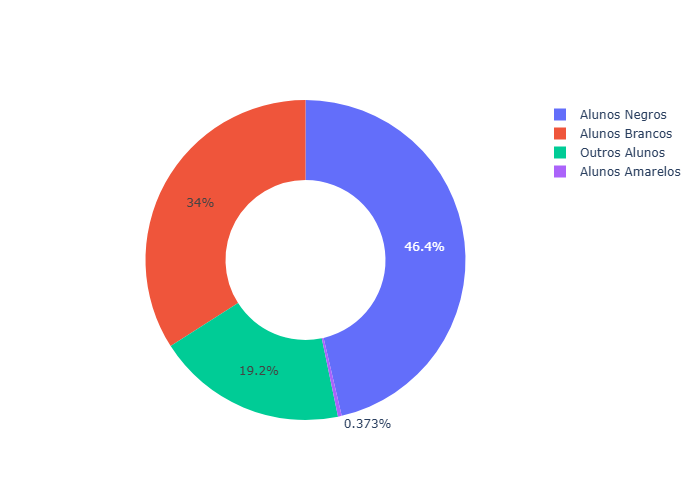

In [34]:
fig = go.Figure(data = go.Pie(labels = legenda_matriculas,
                             values = matriculas,
                             hole = 0.5))

fig.write_image("total_matriculas.png")
Image(filename = "total_matriculas.png")

A partir desse gráfico conseguimos entender qual a divisão racial entre o número absoluto de matrículas, vale resaltar que esses dados são referentes a matrículas, ou seja, um aluno pode ter mais de uma matrícula.
A divisão tem:

- Os alunos negros liderando os números absolutos com quase metade da totaliade de matrículas, cerca de 46.4%, tendo aproximadamente 21,6 milhões de matrículas
- Os alunos brancos com cerca de 34%, com um total de aproximadamente 16 milhões de matrículas
- Outros alunos, que seriam alunos que não têm sua raça declarada, com cerca de 19.2% e aproximadamente 9 milhões de matrículas

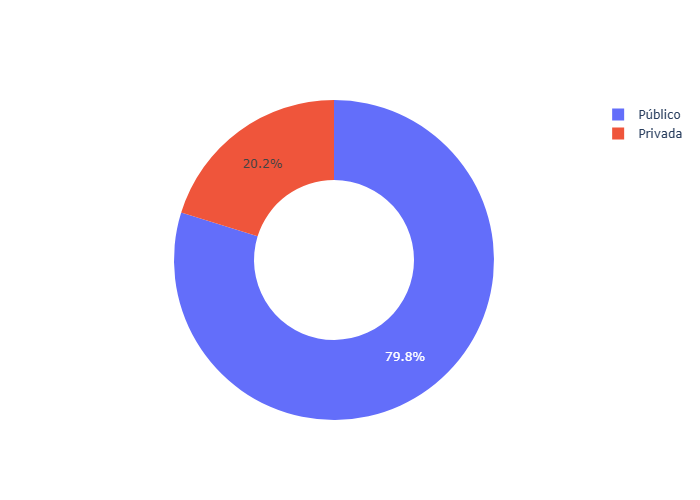

In [36]:
fig = go.Figure(data = go.Pie(labels = legenda_tipo_escola,
                             values = tipo_escola,
                             hole = 0.5))

fig.write_image("tipos_matriculas.png")
Image(filename = 'tipos_matriculas.png')

A análise entre a totalidade de matrículas entre as instituições públicas e privadas, demonstram uma clara desigualdade. Enquanto as escolas públicas representam cerca de 79.8% da totalidade de matrículas, as escolas privadas representam 20.2%, mas qual será a relação quando colocamos os grupos raciais em pauta nessa comparação?

In [36]:
educacao["Negra (Privada)"] = educacao["Preta (Privada)"] + educacao["Parda (Privada)"]
educacao["Negra (Publico)"] = educacao["Preta (Publico)"] + educacao["Parda (Publico)"]

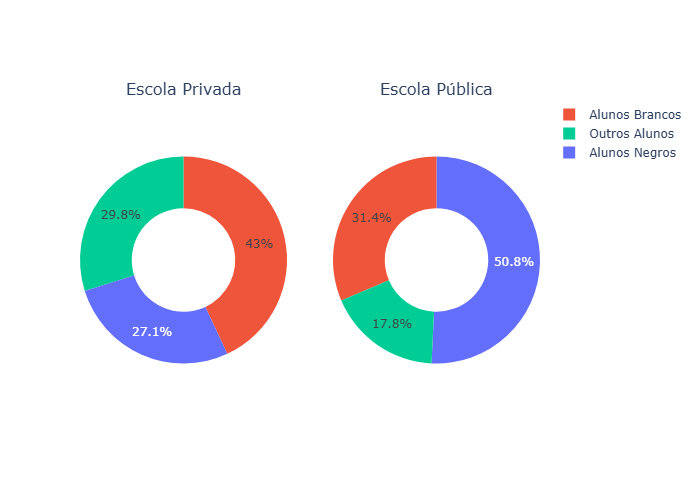

In [37]:


negra_escola_privada = educacao["Negra (Privada)"].sum()
branca_escola_privada = educacao["Branca (Privada)"].sum()
outros_escola_privada = educacao["Total de Privada"].sum() - negra_escola_privada - branca_escola_privada

legenda_escola_privada = ["Alunos Negros", "Alunos Brancos", "Outros Alunos"]
dados_escola_privada = [negra_escola_privada, branca_escola_privada, outros_escola_privada]

negra_escola_publica = educacao["Negra (Publico)"].sum()
branca_escola_publica = educacao["Branca (Publico)"].sum()
outros_escola_publica = educacao["Total de Público"].sum() - negra_escola_publica - branca_escola_publica

legenda_escola_publica = ["Alunos Negros", "Alunos Brancos", "Outros Alunos"]
dados_escola_publica = [negra_escola_publica, branca_escola_publica, outros_escola_publica]



cores = ['#636efa', '#ef553b', '#00cc96']

fig = make_subplots(rows = 1, cols = 2, 
                    specs = [[{'type' : 'domain'}, {'type' : 'domain'}]],
                    subplot_titles = ("Escola Privada","Escola Pública"))

fig.add_trace(go.Pie(labels = legenda_escola_privada,
                    values = dados_escola_privada,
                    marker_colors = cores,
                    hole = 0.5), row = 1, col = 1)
fig.add_trace(go.Pie(labels = legenda_escola_publica,
                    values = dados_escola_publica,
                    marker_colors = cores,
                    hole = 0.5), row = 1, col = 2)

fig.write_image("privada_particular.png")
Image(filename = "privada_particular.png")


Quando comparamos as duas instituições de forma separada, analisando sua estrutura, observamos uma clara dispariedade.

- Negros: Quando olhamos para os alunos negros, temos que eles representam mais da metade das matrículas no ensino público, cerca de 50.8%, agora nas entidades privadas representam 27.1%, uma queda percentual de quase metade
- Brancos: O caso que ocorrem com os alunos negros, se inverte para os alunos brancos, seu percentual em entidades públicas é cerca de 31.4% enquanto em instituições privadas esse valor sobe para 43%
- Outros alunos: para os alunos que não tiveram raças declaradas ocorre o mesmo cenário que os alunos brancos, no ensino público com 17.8% e no ensino privado para cerca de 29.8%

Essa inversão na distribuição de alunos negros e brancos entre as duas redes de ensino reforça a conclusão de uma acentuada desigualdade educacional. A diferença pode ser diretamente ligada a fatores socioeconômicos, visto que o acesso à educação privada geralmente exige uma renda familiar mais alta.

In [40]:
educacao["% de negros na publica"] = (educacao["Negra (Publico)"] / (educacao["Negra (Publico)"] + educacao["Branca (Publico)"])) * 100
educacao["% de negros na privada"] = (educacao["Negra (Privada)"] / (educacao["Negra (Privada)"] + educacao["Branca (Privada)"])) * 100
 
educacao1 = educacao.sort_values(by = "% de negros na publica", ascending = False)
educacao2 = educacao.sort_values(by = "% de negros na privada", ascending = False)


estados_brancos_publicas = (educacao1["Branca (Publico)"] / (educacao1["Negra (Publico)"] + educacao1["Branca (Publico)"])) * 100
estados_brancos_publicas = estados_brancos_publicas.tolist()
estados_negros_publicas = (educacao1["Negra (Publico)"] / (educacao1["Negra (Publico)"] + educacao1["Branca (Publico)"])) * 100
estados_negros_publicas = estados_negros_publicas.tolist()

estados_brancos_privadas = (educacao2["Branca (Privada)"] / (educacao2["Negra (Privada)"] + educacao2["Branca (Privada)"])) * 100
estados_brancos_privadas = estados_brancos_privadas.tolist()
estados_negros_privadas = (educacao2["Negra (Privada)"] / (educacao2["Negra (Privada)"] + educacao2["Branca (Privada)"])) * 100
estados_negros_privadas = estados_negros_privadas.tolist()
siglas1 = educacao1["Localidade da Escola"].tolist()
siglas2 = educacao2["Localidade da Escola"].tolist()


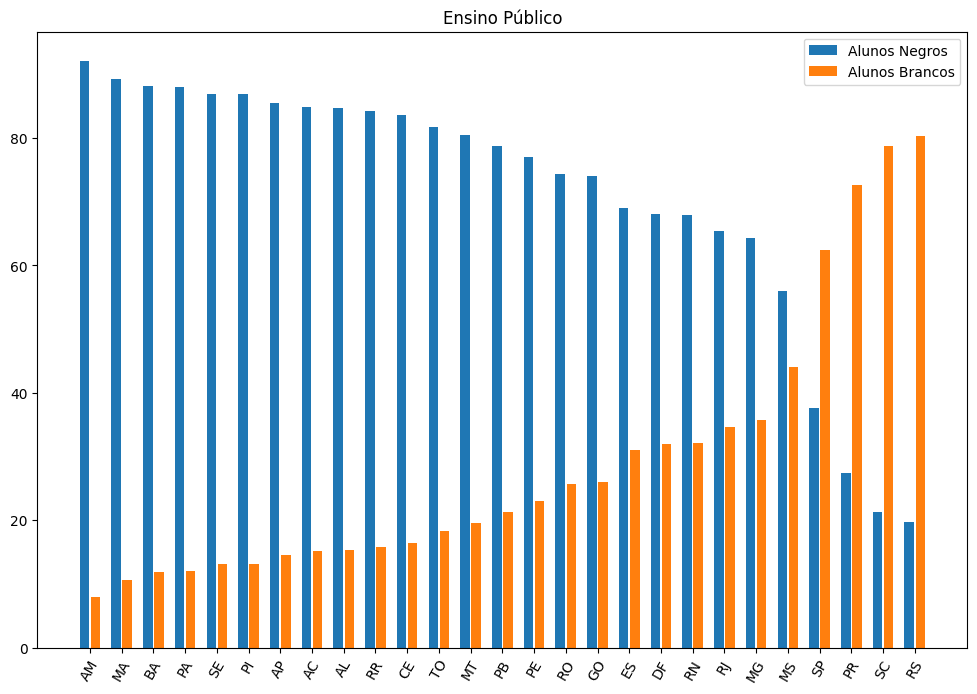

In [42]:
fig , ax = plt.subplots(figsize = (12,8))
indice = np.arange(len(siglas1))
barra_negra = ax.bar(indice, estados_negros_publicas, 0.3, label = "Alunos Negros")
barra_branca = ax.bar(indice + 0.35,estados_brancos_publicas,0.3, label = "Alunos Brancos")
ax.set_xticks(indice + 0.35 / 2)
ax.set_xticklabels(siglas1, rotation = 60)
ax.set_title("Ensino Público")

plt.legend()
plt.show()

O gráfico referente ao ensino público nós mostra um cenário esperado se comparado com as conclusões que foram retiradas da analíse econômica, os principais estados com percentuais altos de alunos negros no ensino público são praticamente todos os estados do Norte e Nordeste.

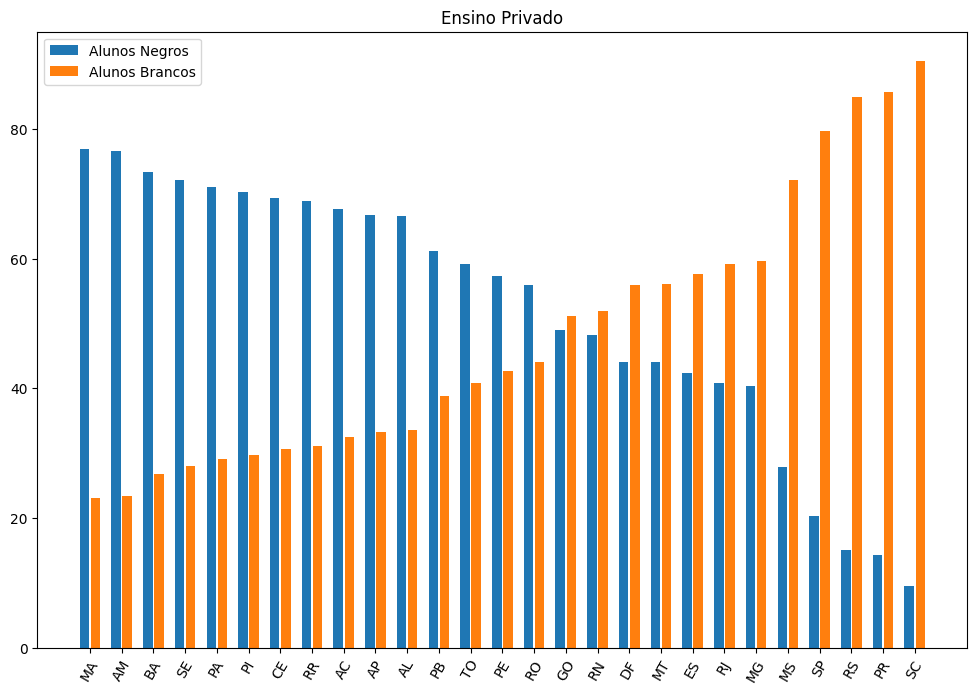

In [43]:
fig, ax = plt.subplots(figsize = (12,8))
indice = np.arange(len(siglas2))
barra_negra_privada = ax.bar(indice, estados_negros_privadas, 0.3, label = "Alunos Negros")
barra_branca_privada = ax.bar(indice + 0.35, estados_brancos_privadas, 0.3, label = "Alunos Brancos")

ax.set_xticks(indice + 0.35 / 2)
ax.set_xticklabels(siglas2, rotation = 60)
ax.set_title("Ensino Privado")
plt.legend()
plt.show()

A análise da distribuição de matrículas no ensino privado revela um panorama distinto do público. Neste segmento, a população branca possui maior representatividade, e a disparidade racial é particularmente acentuada no Sul do país. Curiosamente, nas regiões Norte e Nordeste, onde a população negra é majoritária, a proporção entre os grupos raciais no ensino privado demonstra uma maior equidade, em contraste com a dinâmica observada nas escolas públicas.

Text(0, 0.5, '% da população que possui ensino superior')

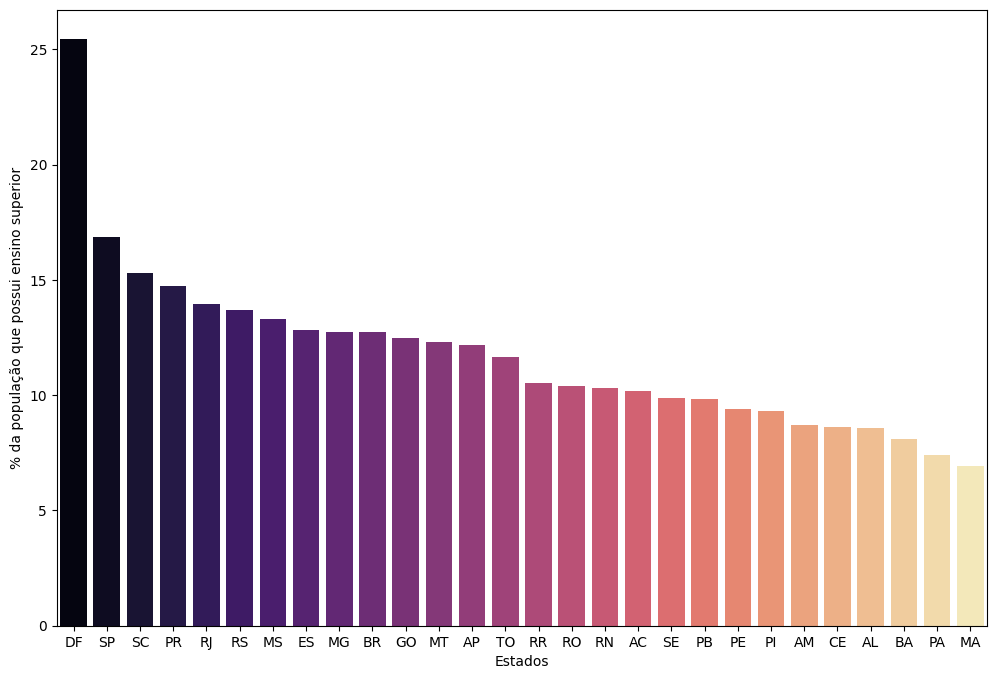

In [44]:
ordenado_ensino = principal.sort_values(by = "% de Pessoas com ensino superior", ascending = False)["Siglas"]
fig = plt.figure(figsize = (12,8))

sns.barplot(data = principal,
           x = "Siglas",
           y = "% de Pessoas com ensino superior",
           order = ordenado_ensino,
           palette = "magma")

plt.xlabel("Estados")
plt.ylabel("% da população que possui ensino superior")

A distribuição de pessoas com ensino superior no Brasil evidencia um cenário de contraste regional. Enquanto o Distrito Federal, São Paulo e os estados do Sul se destacam com os maiores percentuais, as últimas posições são ocupadas por **todos os estados das regiões Norte e Nordeste**. Essa realidade está bem abaixo da média nacional, que é de aproximadamente 14%.

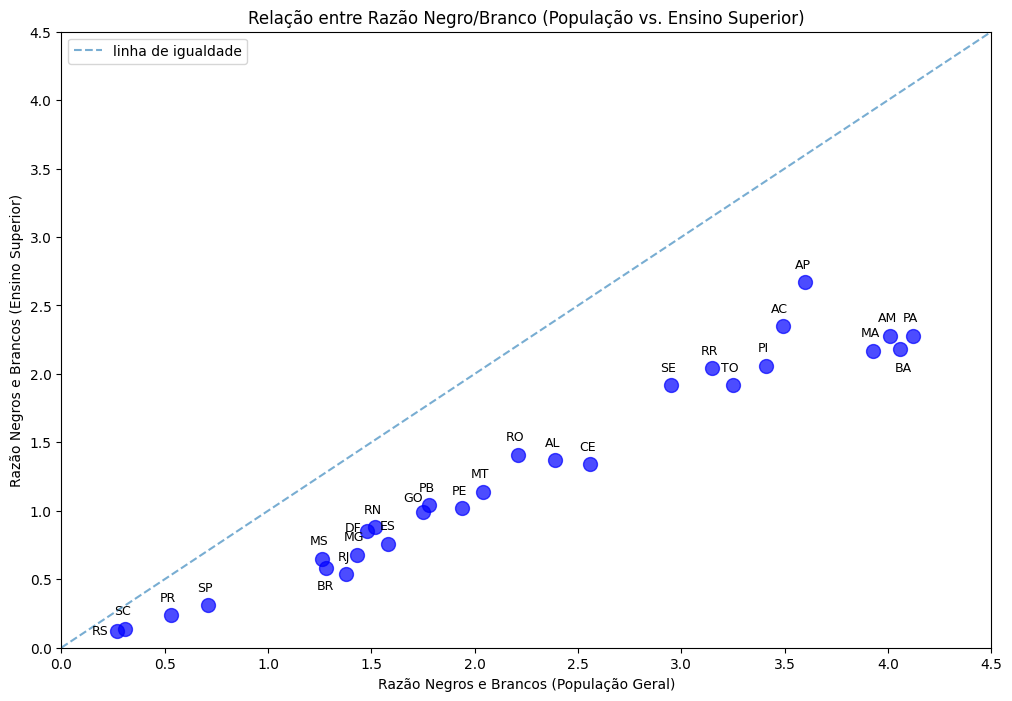

In [45]:
razao_pop = principal["% Razão Negros x Brancos, População"].tolist()
razao_ensino = principal["Razão Negros X Brancos, Ensino Superior"].tolist()
estados = principal["Siglas"].tolist()
plt.figure(figsize= (12,8))
plt.xlim(0,4.5)
plt.ylim(0,4.5)
plt.scatter(razao_pop,razao_ensino, color = 'b', s = 100, alpha = 0.70)
plt.plot([0,4.5],[0,4.5], linestyle = '--', alpha = 0.6, label = "linha de igualdade")

pontos_errados = {16:(2,-16),0:(0,-15), 23:(-12,-2), 27:(-10,0), 18:(0,10), 26:(-7,8)}


for i,txt in enumerate(estados):
    if i in pontos_errados:
        text_offset = pontos_errados[i]
    else:
        text_offset = (-2,10)
    plt.annotate(txt,(razao_pop[i],razao_ensino[i]), 
                 textcoords = "offset points", xytext = text_offset, ha = "center", fontsize = 9)
plt.xlabel("Razão Negros e Brancos (População Geral)")
plt.ylabel("Razão Negros e Brancos (Ensino Superior)")
plt.title("Relação entre Razão Negro/Branco (População vs. Ensino Superior)")
plt.legend()

**A razão de negros e brancos foi calculada como: População Negra / População Branca   de cada estado**

Uma análise da distribuição educacional revela uma acentuada disparidade racial. A razão entre a população negra e branca na sociedade não se reflete nos índices de ensino superior, onde a representatividade negra é sempre menor. Essa discrepância é visível em **todos os estados do país**, confirmando que a proporção de negros com ensino superior é desproporcional à sua presença demográfica.

Respondendo essas perguntas de uma forma geral: 

Será que existe uma diferença racial no sistema de educação? 

Há uma divisão entre pessoas brancas e negras tanto no ensino básico quanto ensino superior? Se sim qual seria essa divisão? 

Existe diferença se analisarmos o ensino público com o ensino privado?

### Conclusão
As análises gráficas confirmam uma profunda disparidade racial na educação brasileira. No ensino básico, a população negra está majoritariamente concentrada na rede pública, enquanto a população branca domina as instituições privadas, que historicamente apresentam indicadores de qualidade superiores.

Esse cenário se acentua no ensino superior. Os estados com os menores percentuais de população negra são os mesmos que possuem os mais altos índices de pessoas com graduação. A discrepância se torna ainda mais evidente ao comparar a proporção da população negra total com a parcela que alcançou o ensino superior: a representatividade do grupo cai de forma acentuada em todos os estados do Brasil, sem exceção, reforçando que essa desigualdade é um problema de dimensão nacional.

# Conclusão final

Respondendo a principal pergunta do projeto - "Mesmo depois do fim da escravidão ainda existe diferenças entre brancos e negros?".

Com base nas análises feitas neste projeto, é inegável que sim, existem diferenças entre brancos e negros. Exploramos apenas duas óticas, a econômica e a educacional, de forma simples, mas já conseguimos perceber a assustadora diferença entre esses dois grupos. Em todos os cenários positivos que comparamos, a população branca possui uma clara vantagem: seus salários são, em média, cerca de 70% maiores, e há uma grande diferença em percentuais de população com ensino superior, com crianças matriculadas no ensino privado, entre outros indicadores.

Toda essa diferença se deve a diversos fatores complexos que não podem ser ignorados. A principal medida que todos podemos tomar em prol da sociedade é entender e aceitar que **sim, essa diferença existe**. Para que possamos mudar algo, primeiro precisamos aceitar que o problema existe.